In [2]:
# import
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.option_context('mode.use_inf_as_na', True)
plt.rcParams.update({'font.size': 14})

In [3]:
# read files
dirpath = os.getcwd()
features_path = r"C:\Users\marie\rep_codes\udder_project\udder_processing\features_dict\gmfeature_table.csv"
data_path = r"C:\Users\marie\rep_codes\udder_project\delpro_vms\data_out"
plot_dir = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir),r"adsa\examples")

fdf = pd.read_csv(features_path)
fdf[fdf.columns[3:]] = fdf[fdf.columns[3:]].apply(pd.to_numeric, errors='coerce')
ddf = pd.read_csv(os.path.join(data_path, "mko_integrated.csv"))

In [4]:
# merge files 
df = fdf.merge(ddf, on = ["cow"], how = "left")
df["ko_cow"] = [1 if df.iloc[i].dko_udder_dim_cl > 5 else 0 for i in range(len(df.cow))]
df["ko_back"] = [1 if (df.iloc[i].dko_lb_dim_cl > 5) |  (df.iloc[i].dko_rb_dim_cl > 5) else 0 for i in range(len(df.cow))]
df["ko_front"] = [1 if (df.iloc[i].dko_lf_dim_cl > 5) |  (df.iloc[i].dko_rf_dim_cl > 5) else 0 for i in range(len(df.cow))]
df["ko_right"] = [1 if (df.iloc[i].dko_rf_dim_cl > 5) |  (df.iloc[i].dko_rb_dim_cl > 5) else 0 for i in range(len(df.cow))]
df["ko_left"] = [1 if (df.iloc[i].dko_lf_dim_cl > 5) |  (df.iloc[i].dko_lb_dim_cl > 5) else 0 for i in range(len(df.cow))]

In [5]:
sum(df["ko_cow"])

61

In [10]:
sum(df["ko_left"])

32

In [11]:
sum(df["ko_right"])

26

In [12]:
sum(df["ko_back"])

32

In [13]:
sum(df["ko_front"])

23

In [4]:
mdf = pd.melt(df, value_vars = ['back_eu', 'front_eu', 'right_eu', 'left_eu'], id_vars =['cow', "ko_cow", "ko_right","ko_back", "ko_front", "ko_left"])

<Axes: xlabel='variable', ylabel='value'>

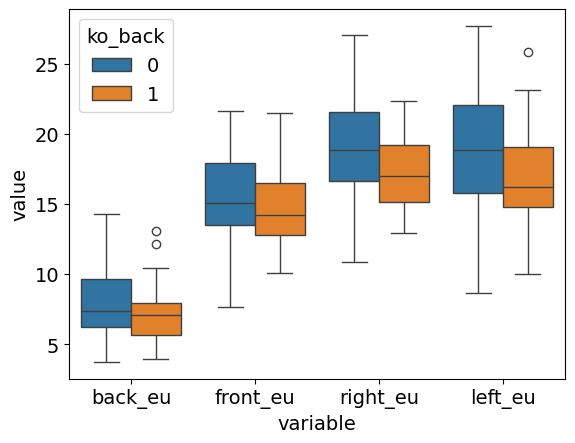

In [5]:
sns.boxplot(data=mdf, y="value", x = "variable", hue = "ko_back")

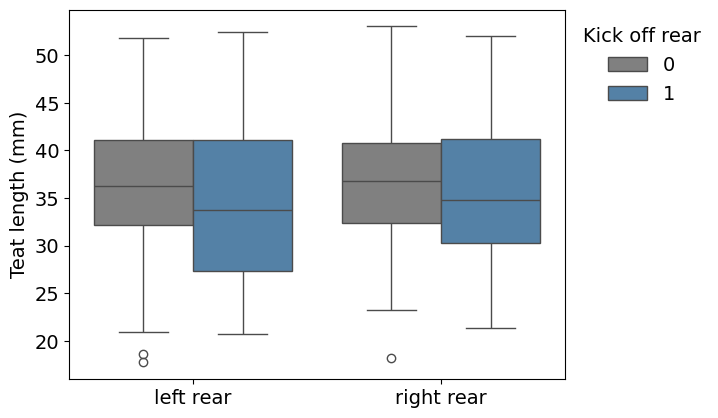

In [9]:
my_colors = ["gray", "steelblue",  
             "royalblue", "skyblue"]
sns.set_palette( my_colors )
df2 = df.rename(columns={'lb_len': "left rear", 'rb_len': "right rear"})
mdf = pd.melt(df2, value_vars = ["left rear", "right rear"], id_vars =['cow', "ko_cow", "ko_right","ko_back", "ko_front", "ko_left"])
ax = sns.boxplot(data=mdf, y="value", x = "variable", hue = "ko_cow")
plt.xlabel("")
plt.ylabel("Teat length (mm)")
plt.legend(title="Kick off rear")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1),  frameon=False)
plt.savefig(os.path.join(plot_dir, "ko_ken.png"),bbox_inches='tight')

In [15]:
t = df2[["left rear", "right rear", "ko_back"]].dropna()
print(len(t))
sum(t["ko_back"])

114


27

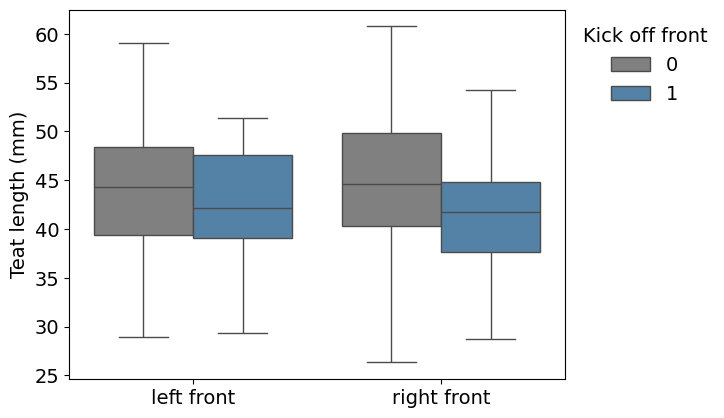

In [14]:
my_colors = ["gray", "steelblue",  
             "royalblue", "skyblue"]
sns.set_palette( my_colors )
df2 = df.rename(columns={'lf_len': "left front", 'rf_len': "right front"})
mdf = pd.melt(df2, value_vars = ["left front", "right front"], id_vars =['cow', "ko_cow", "ko_right","ko_back", "ko_front", "ko_left"])
ax = sns.boxplot(data=mdf, y="value", x = "variable", hue = "ko_front")
plt.xlabel("")
plt.ylabel("Teat length (mm)")
plt.legend(title="Kick off front")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1),  frameon=False)
plt.savefig(os.path.join(plot_dir, "ko_front.png"),bbox_inches='tight')

In [15]:
t = df2[["left front", "right front", "ko_front"]].dropna()
print(len(t))
sum(t["ko_front"])

102


15

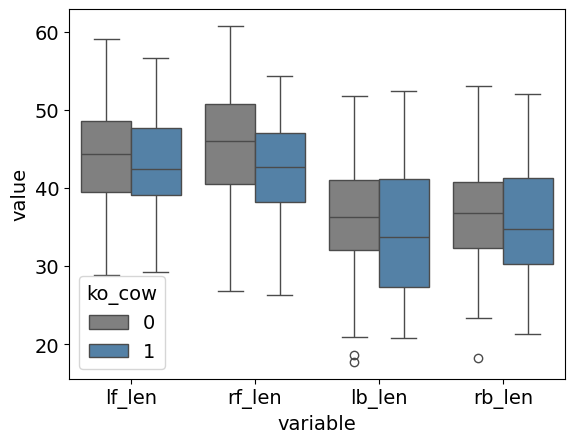

In [49]:
mdf = pd.melt(df, value_vars = ["lf_len", "rf_len", "lb_len", "rb_len"], id_vars =['cow', "ko_cow", "ko_right","ko_back", "ko_front", "ko_left"])
ax = sns.boxplot(data=mdf, y="value", x = "variable", hue = "ko_cow")

<Axes: xlabel='ko_front', ylabel='front_eu'>

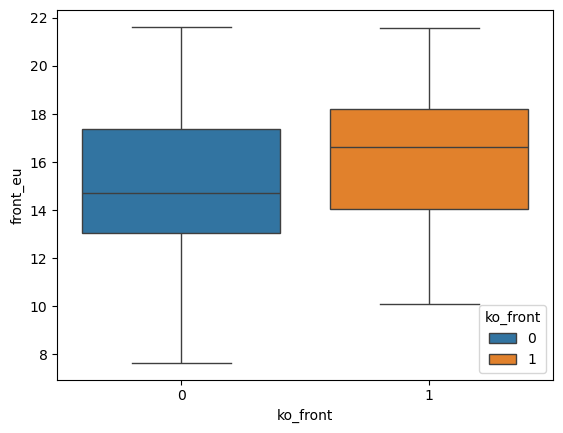

In [11]:
sns.boxplot(data=df, y="front_eu", x = "ko_front", hue = "ko_front")

<Axes: xlabel='ko_right', ylabel='right_eu'>

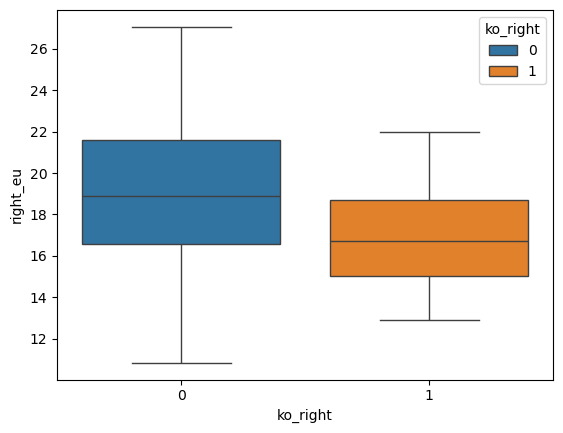

In [12]:
sns.boxplot(data=df, y="right_eu", x = "ko_right", hue = "ko_right")

<Axes: xlabel='ko_left', ylabel='left_eu'>

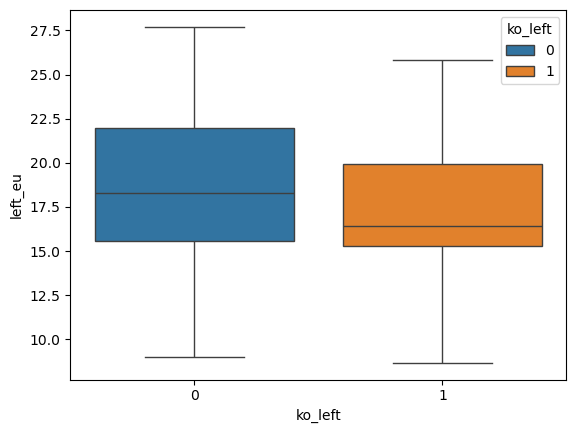

In [13]:
sns.boxplot(data=df, y="left_eu", x = "ko_left", hue = "ko_left")

C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

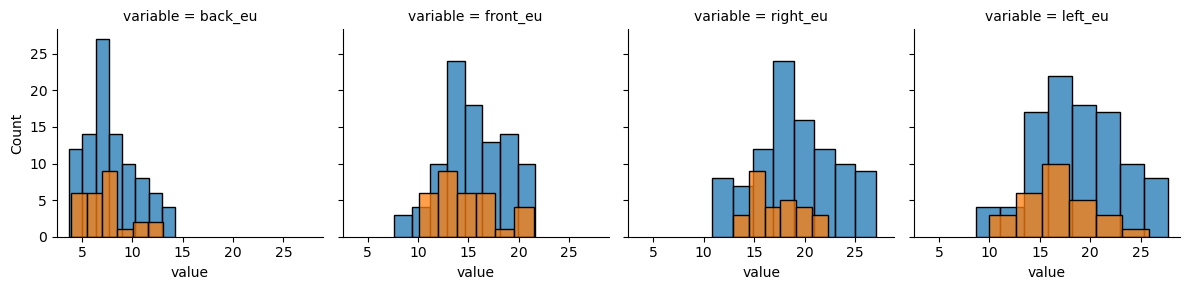

In [68]:
graph = sns.FacetGrid(mdf, col ="variable", hue = "ko_back")
graph.map(sns.histplot, "value")

C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

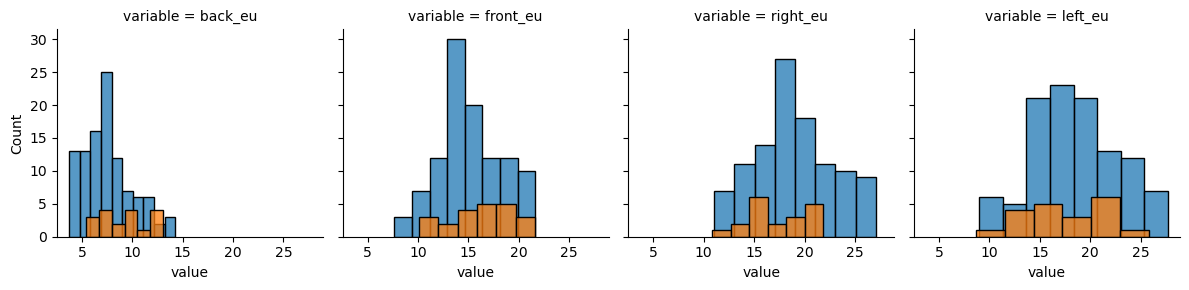

In [69]:
graph = sns.FacetGrid(mdf, col ="variable", hue = "ko_front")
graph.map(sns.histplot, "value")

C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

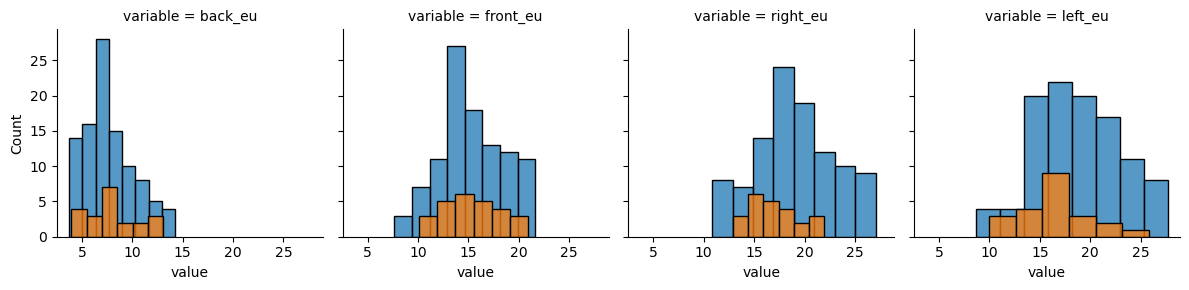

In [70]:
graph = sns.FacetGrid(mdf, col ="variable", hue = "ko_right")
graph.map(sns.histplot, "value")

C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

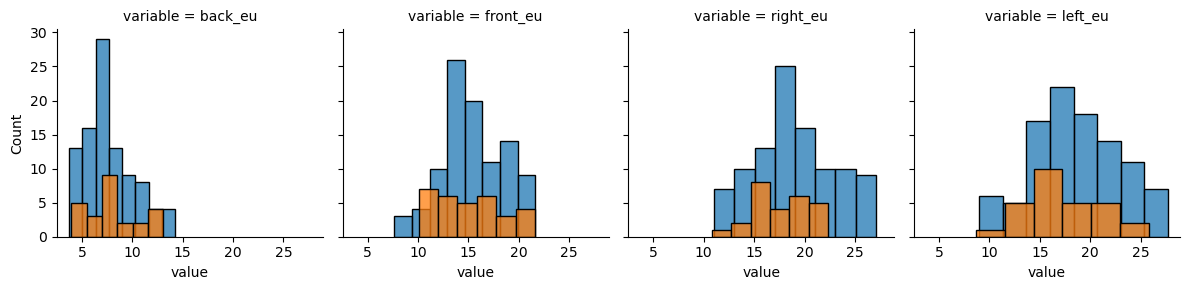

In [71]:
graph = sns.FacetGrid(mdf, col ="variable", hue = "ko_left")
graph.map(sns.histplot, "value")

<Axes: xlabel='variable', ylabel='value'>

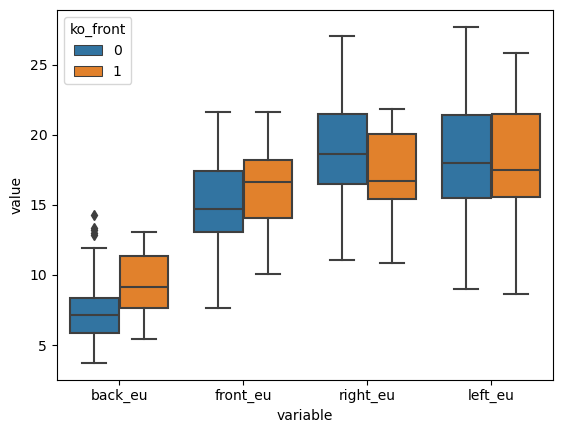

In [6]:
sns.boxplot(data=mdf, y="value", x = "variable", hue = "ko_front")

<Axes: xlabel='variable', ylabel='value'>

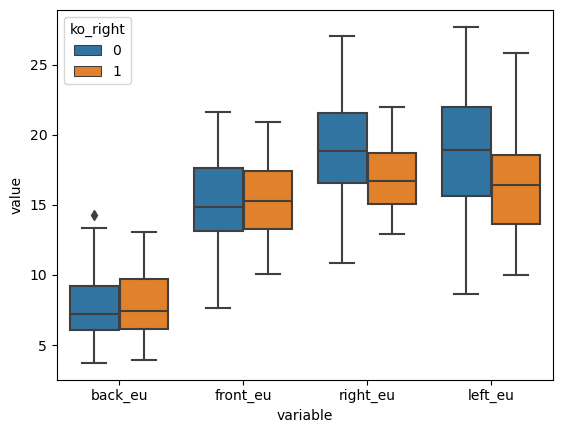

In [7]:
sns.boxplot(data=mdf, y="value", x = "variable", hue = "ko_right")

<Axes: xlabel='variable', ylabel='value'>

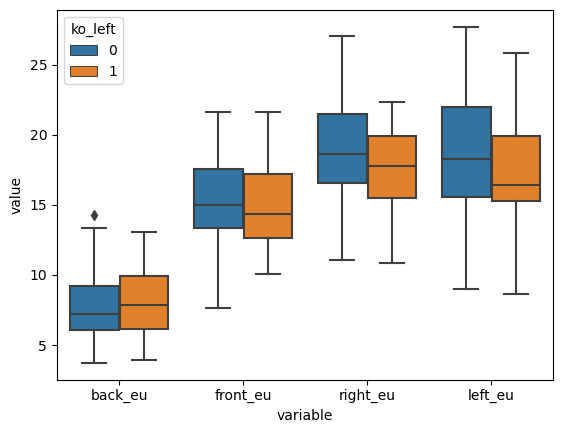

In [8]:
sns.boxplot(data=mdf, y="value", x = "variable", hue = "ko_left")

In [47]:
x_vars = ['back_eu', 'front_eu']
y_var = "ko_back"
vars =  x_vars + [y_var]
df2 = df[vars].dropna().reset_index()
X = df2[x_vars]
y = df2[y_var]

In [77]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
clf = svm.SVC(class_weight = {1 : 5, 0 : 1})
clf.fit(X_train, y_train)


array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [80]:
print(y_test - clf.predict(X_test))

80     0
4      0
40     0
69     0
10     0
45     0
70     0
66     0
47    -1
11     0
98     0
36     1
83     1
111    1
18    -1
0      0
72    -1
26    -1
81     0
53     0
104    1
91     1
12     0
31     0
67    -1
110    1
107    0
22    -1
44     0
108   -1
78     0
15     0
30    -1
103    0
9      0
33     0
62    -1
65     1
Name: ko_back, dtype: int64
